# Projeto - Cálculo

## Imports

In [2]:
%pip install latexify-py

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import latexify
import math

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import rc

## Código

### Criando o ambiente 3d e o espaço vetorial

In [103]:
%matplotlib inline

In [112]:
@latexify.function
def F(r, theta):
    return np.array([r*math.cos(theta), r*math.sin(theta), math.sin(r)])

F

In [105]:
def normalize(F):
    return F / np.linalg.norm(F)

In [106]:
def setnorm(F, norm):
    return F * norm

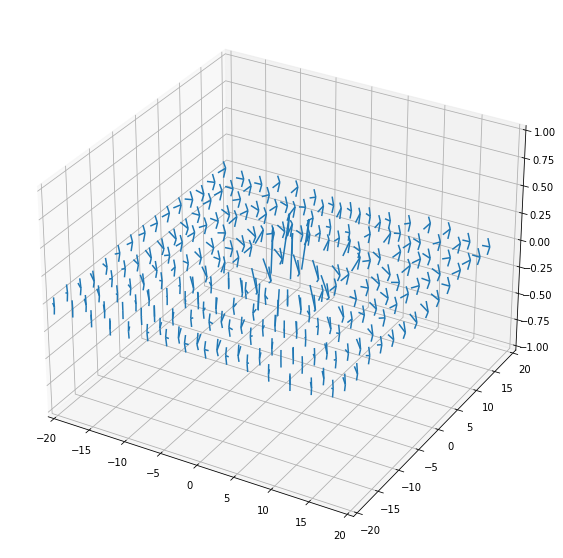

In [114]:
n = 15

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xlow = -20
xhigh = 20
ylow = -20
yhigh = 20

for i in range(n):
    for j in range(n):
        x = xlow + (xhigh - xlow)/n*i
        y = ylow + (yhigh - ylow)/n*j
        r = math.sqrt(x**2 + y**2)
        ax.quiver(x, y, 0, *setnorm(normalize(F(r, np.arcsin(y/r))), 1))
ax.set_xlim([xlow, xhigh])
ax.set_ylim([ylow, yhigh])
ax.set_zlim([-1, 1])
plt.show()

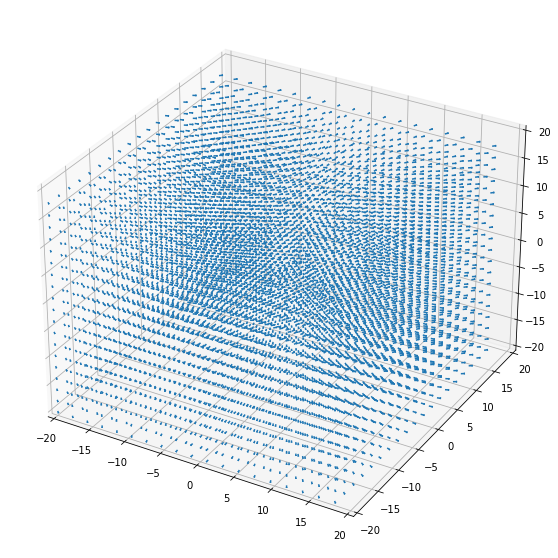

In [115]:
n = 19

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

xlow = -20
xhigh = 20
ylow = -20
yhigh = 20
zlow = -20
zhigh = 20

for i in range(n):
    for j in range(n):
        for k in range(n):
            x = xlow + (xhigh - xlow)/n*i
            y = ylow + (yhigh - ylow)/n*j
            z = zlow + (zhigh - zlow)/n*k
            r = math.sqrt(x**2 + y**2)
            ax.quiver(x, y, z, *setnorm(normalize(F(r, np.arcsin(y/r))), 0.5))
ax.set_xlim([xlow, xhigh])
ax.set_ylim([ylow, yhigh])
ax.set_zlim([zlow, zhigh])
plt.show()

## Adicionando partículas ao espaço vetorial

In [116]:
%matplotlib notebook

In [117]:
class Particle:
    def __init__(self, x, y, z):
        self.pos = np.array([x, y, z])
        self.vel = np.array([0, 0, 0])
        self.r = math.sqrt(self.pos[0]**2 + self.pos[1]**2 + self.pos[2]**2)
        self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))
    
    def update(self):
        self.pos = self.pos + self.vel
        self.vel = self.vel + self.acc
        self.r = math.sqrt(self.pos[0]**2 + self.pos[1]**2+ self.pos[2]**2)
        self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))

In [122]:
# Crio 25 partículas uniformemente espaçadas no plano xy

particles = []
n = 2

xlow = -5
xhigh = 5
ylow = -5
yhigh = 5

for i in range(n):
    for j in range(n):
        x = xlow + (xhigh - xlow)/n*i
        y = ylow + (yhigh - ylow)/n*j
        particles.append(Particle(x, y, 0))
        
xlow = -100
xhigh = 100
ylow = -100
yhigh = 100

C:\Users\gabri\AppData\Local\Temp/ipykernel_16456/3463392176.py:6: RuntimeWarning: invalid value encountered in double_scalars
  self.acc = F(self.r, np.arcsin(self.pos[1]/self.r))


In [119]:
# Atualizo todas as partículas
def updateParticles(particles):
    for i in range(len(particles)):
        particles[i].update()

In [120]:
# Desenho um frame da animação
def drawParticles(n):
    if n != 0:
        updateParticles(particles)

    for particle in particles:
        ax.scatter(*particle.pos, c='black')
    
    return [ax]

In [125]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.set_xlim([xlow, xhigh])
ax.set_ylim([ylow, yhigh])
ax.set_zlim([zlow, zhigh])
anim = animation.FuncAnimation(fig, drawParticles, 400, interval=35)

<IPython.core.display.Javascript object>

In [127]:
HTML(anim.to_html5_video())

C:\Users\gabri\AppData\Local\Temp/ipykernel_16456/3463392176.py:11: RuntimeWarning: overflow encountered in double_scalars
  self.r = math.sqrt(self.pos[0]**2 + self.pos[1]**2+ self.pos[2]**2)


ValueError: math domain error